In [ ]:
import numy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib

In [6]:

data = pd.read_csv("dataset_med.csv")
data

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [71]:
data["age"]=data["age"].astype(int)
data["age"]

ValueError: Cannot convert float NaN to integer

data['age'].max

In [82]:
data['cancer_stage']=data['cancer_stage'].astype('category')
data.dtypes

id                       int64
age                       int8
gender                  object
country                 object
diagnosis_date          object
cancer_stage          category
family_history          object
smoking_status          object
bmi                    float64
cholesterol_level        int64
hypertension             int64
asthma                   int64
cirrhosis                int64
other_cancer             int64
treatment_type          object
end_treatment_date      object
survived                 int64
age_group             category
dtype: object

In [78]:
data.dtypes

id                       int64
age                       int8
gender                  object
country                 object
diagnosis_date          object
cancer_stage            object
family_history          object
smoking_status          object
bmi                    float64
cholesterol_level        int64
hypertension             int64
asthma                   int64
cirrhosis                int64
other_cancer             int64
treatment_type          object
end_treatment_date      object
survived                 int64
age_group             category
dtype: object

In [8]:
data.describe()

,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,445000.500000,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,256921.014128,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,1.000000,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222500.750000,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,445000.500000,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,667500.250000,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,890000.000000,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
data['age_group'] = pd.cut(data['age'], bins=[0,18,40,60,105],labels=['Child','Adult','Senior Citizen','Old'])
data

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,age_group
0,1,3,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0,Child
1,2,2,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1,Child
2,3,3,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0,Child
3,4,2,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0,Child
4,5,1,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0,Child
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,1,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0,Child
889996,889997,3,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0,Child
889997,889998,2,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1,Child
889998,889999,3,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0,Child


1. Patient Demographics & Geographic Analysis
•	What is the age distribution of patients across different cancer stages?

In [105]:
import matplotlib.pyplot as plt
data['age_group'] = pd.cut(data['age'], bins=[0,18,40,60,105],labels=['Child','Adult','Senior Citizen','Old'])
stage_age=pd.crosstab(data['age_group'],data['cancer_stage'], normalize='index')*100
print("The age distribution of patients across different cancer stages:\n")
print(stage_age)

The age distribution of patients across different cancer stages:

cancer_stage    Stage I   Stage II  Stage III   Stage IV
age_group                                               
Child         25.001742  24.985333  25.010284  25.002641


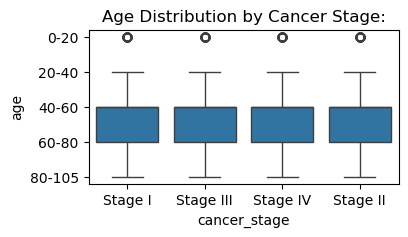

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(4,2))
sns.boxplot(x='cancer_stage', y='age', data=data)
plt.title('Age Distribution by Cancer Stage:')
plt.show()

•	How many male and female patients are there, and what is the average age for each gender?

In [63]:
gender_count=data['gender'].value_counts()
print("The number of male and female patients are: \n")
gender_count
gender_avg=data.groupby('gender')['age'].mean()
gender_avg

The number of male and female patients are: 



TypeError: category dtype does not support aggregation 'mean'

In [65]:
data['age'].dtype

CategoricalDtype(categories=['0-20', '20-40', '40-60', '60-80', '80-105'], ordered=True, categories_dtype=object)

In [88]:
data.drop(['age_group'], axis=1)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,3,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,2,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,3,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,2,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,1,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,1,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,3,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,2,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,3,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0


In [93]:
data.dtypes

id                       int64
age                      int32
gender                  object
country                 object
diagnosis_date          object
cancer_stage          category
family_history          object
smoking_status          object
bmi                    float64
cholesterol_level        int64
hypertension             int64
asthma                   int64
cirrhosis                int64
other_cancer             int64
treatment_type          object
end_treatment_date      object
survived                 int64
age_group             category
dtype: object

In [94]:
data['age']=data['age'].astype(int)
data.dtypes

id                       int64
age                      int32
gender                  object
country                 object
diagnosis_date          object
cancer_stage          category
family_history          object
smoking_status          object
bmi                    float64
cholesterol_level        int64
hypertension             int64
asthma                   int64
cirrhosis                int64
other_cancer             int64
treatment_type          object
end_treatment_date      object
survived                 int64
age_group             category
dtype: object

In [97]:
data['age']=data['age'].astype('int64')

In [98]:
data.dtypes

id                       int64
age                      int64
gender                  object
country                 object
diagnosis_date          object
cancer_stage          category
family_history          object
smoking_status          object
bmi                    float64
cholesterol_level        int64
hypertension             int64
asthma                   int64
cirrhosis                int64
other_cancer             int64
treatment_type          object
end_treatment_date      object
survived                 int64
age_group             category
dtype: object